In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,median_absolute_error

import pandas as pd
import catboost as cb
import numpy as np
import seaborn as sns

In [2]:
data_df = pd.read_csv("data_derived_v2.csv").iloc[:,1:]

/Users/pavankumarboinapalli/DSWorkspace/ProgramFiles/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (8,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data_df.columns

Index(['BOROUGH', 'Bin_No', 'House_No', 'Street_Name', 'Job_No', 'Job_doc_No',
       'Job_Type', 'Self_Cert', 'Block', 'Lot', 'Community_Board', 'Zip_Code',
       'Bldg_Type', 'Residential', 'Work_Type', 'Permit_Status',
       'Filing_Status', 'Permit_Type', 'Permit_Sequence_No', 'Permit_Subtype',
       'Site_Fill', 'Filing_Date', 'Issuance_Date', 'Expiration_Date',
       'Job_Start_Date', 'Permittees_First_Name', 'Permittees_Last_Name',
       'Permittees_Business_Name', 'Permittees_Phone_No',
       'Permittees_License_Type', 'Permittees_License_No',
       'Act_as_Superintendent', 'Superintendent_First_&_Last_Name',
       'Superintendent_Business_Name', 'Owners_Business_Type', 'Non-Profit',
       'Owners_Business_Name', 'Owners_First_Name', 'Owners_Last_Name',
       'Owners_House_No', 'Owners_House_Street_Name', 'Owners_House_City',
       'Owners_House_State', 'Owners_House_Zip_Code', 'Owners_Phone_No',
       'DOBRunDate', 'PERMIT_SI_NO', 'LATITUDE', 'LONGITUDE',
       'C

## Data Preperation for Random Forest Classifier

In [4]:
cols_to_drop = ["Bin_No","House_No","Street_Name","Job_No","Job_doc_No","Block","Community_Board","Permit_Sequence_No","Job_Start_Date","Permittees_First_Name","Permittees_Last_Name","Permittees_Business_Name","Permittees_Phone_No",
                "Permittees_License_No","Superintendent_First_&_Last_Name","Superintendent_Business_Name","Owners_First_Name","Owners_Last_Name","Owners_Business_Name","Owners_House_No","Owners_House_Street_Name",
               "Owners_House_City","DOBRunDate","Owners_Phone_No","PERMIT_SI_NO","LATITUDE","LONGITUDE","DOBRunDate_Year","DOBRunDate_Month","DOBRunDate_Day","DOBRunDate_Decade"]

In [5]:
data_df_rf = data_df.drop(cols_to_drop,axis=1).reset_index(drop=True)

In [6]:
data_df_rf.columns

Index(['BOROUGH', 'Job_Type', 'Self_Cert', 'Lot', 'Zip_Code', 'Bldg_Type',
       'Residential', 'Work_Type', 'Permit_Status', 'Filing_Status',
       'Permit_Type', 'Permit_Subtype', 'Site_Fill', 'Filing_Date',
       'Issuance_Date', 'Expiration_Date', 'Permittees_License_Type',
       'Act_as_Superintendent', 'Owners_Business_Type', 'Non-Profit',
       'Owners_House_State', 'Owners_House_Zip_Code', 'COUNCIL_DISTRICT',
       'CENSUS_TRACT', 'NTA_NAME', 'Days_To_Issue_Permit',
       'Issuance_Date_Year', 'Issuance_Date_Month', 'Issuance_Date_Day',
       'Issuance_Date_Decade', 'Expiration_Date_Year', 'Expiration_Date_Month',
       'Expiration_Date_Day', 'Expiration_Date_Decade', 'Filing_Date_Year',
       'Filing_Date_Month', 'Filing_Date_Day', 'Filing_Date_Decade',
       'Job_Start_Date_Year', 'Job_Start_Date_Month', 'Job_Start_Date_Day',
       'Job_Start_Date_Decade'],
      dtype='object')

In [7]:
data_df_rf[data_df_rf.select_dtypes('int').columns] = data_df_rf.select_dtypes('int').astype('str')

In [8]:
data_df_rf['Days_To_Issue_Permit'] = data_df_rf['Days_To_Issue_Permit'].apply(lambda x: int(x))



In [9]:
data_df_rfs = data_df_rf.loc[data_df_rf['Filing_Date_Year'].isin(["2015",]),:].reset_index().drop('index',axis=1)

In [10]:
data_df_rfs = data_df_rfs.drop(['Filing_Date','Issuance_Date','Job_Start_Date_Year','Issuance_Date_Year','Filing_Date_Month','Issuance_Date_Month','Job_Start_Date_Month','Filing_Date_Year','Expiration_Date_Year','Filing_Date_Day','Issuance_Date_Day','Job_Start_Date_Day','Expiration_Date'],axis=1)

In [11]:
for col in data_df_rfs.columns:
    data_df_rfs[col] = data_df_rfs[col].fillna(data_df_rfs[col].mode()[0])

In [12]:
# X_train_dummy = pd.get_dummies(X_train)

In [13]:
# X_test_dummy = pd.get_dummies(X_test)

In [14]:
X_train,X_test,y_train,y_test = train_test_split(data_df_rfs.drop('Days_To_Issue_Permit',axis=1),data_df_rfs['Days_To_Issue_Permit'],random_state=0,train_size=0.7)

/Users/pavankumarboinapalli/DSWorkspace/ProgramFiles/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [15]:
col_indes = np.where(X_train.dtypes != np.float)[0]

In [16]:
col_indes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

In [17]:
X_train = X_train.copy()

In [18]:
for col in X_train.columns:
    X_train.loc[X_train[col].isna(),col] = X_train[col].mode()

In [19]:
X_train.isna().sum()

BOROUGH                    0
Job_Type                   0
Self_Cert                  0
Lot                        0
Zip_Code                   0
Bldg_Type                  0
Residential                0
Work_Type                  0
Permit_Status              0
Filing_Status              0
Permit_Type                0
Permit_Subtype             0
Site_Fill                  0
Permittees_License_Type    0
Act_as_Superintendent      0
Owners_Business_Type       0
Non-Profit                 0
Owners_House_State         0
Owners_House_Zip_Code      0
COUNCIL_DISTRICT           0
CENSUS_TRACT               0
NTA_NAME                   0
Issuance_Date_Decade       0
Expiration_Date_Month      0
Expiration_Date_Day        0
Expiration_Date_Decade     0
Filing_Date_Decade         0
Job_Start_Date_Decade      0
dtype: int64

In [20]:
np.array(col_indes).shape

(28,)

In [49]:
cb_model = cb.CatBoostRegressor(iterations=1000,learning_rate=2,depth=10,cat_features=col_indes)

In [50]:
cb_model.fit(X=X_train,y=y_train,cat_features=col_indes)

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 26.0313763	total: 73.4ms	remaining: 1m 13s
1:	learn: 26.0151066	total: 668ms	remaining: 5m 33s
2:	learn: 26.0053131	total: 1.24s	remaining: 6m 51s
3:	learn: 25.9903553	total: 1.73s	remaining: 7m 9s
4:	learn: 25.9662494	total: 2.24s	remaining: 7m 25s
5:	learn: 25.9471888	total: 2.71s	remaining: 7m 28s
6:	learn: 25.9471754	total: 2.72s	remaining: 6m 26s
7:	learn: 25.9132786	total: 3.31s	remaining: 6m 50s
8:	learn: 25.8827704	total: 4.08s	remaining: 7m 29s
9:	learn: 25.7329074	total: 4.75s	remaining: 7m 50s
10:	learn: 25.7142092	total: 5.36s	remaining: 8m 2s
11:	learn: 25.5501667	total: 5.91s	remaining: 8m 6s
12:	learn: 25.5437451	total: 6.52s	remaining: 8m 14s
13:	learn: 25.5023132	total: 7.11s	remaining: 8m 20s
14:	learn: 25.4707162	total: 7.64s	remaining: 8m 21s
15:	learn: 25.3989313	total: 8.14s	remaining: 8m 20s
16:	learn: 25.3679670	total: 8.7s	remaining: 8m 22s
17:	learn: 25.2864031	total: 9.17s	remaining: 8m 20s
18:	learn: 25.2318675	total: 9.68s	remaining: 8m 19s
19:	le

155:	learn: 21.2644189	total: 1m 27s	remaining: 7m 53s
156:	learn: 21.2532151	total: 1m 28s	remaining: 7m 52s
157:	learn: 21.2344603	total: 1m 28s	remaining: 7m 52s
158:	learn: 21.2166345	total: 1m 29s	remaining: 7m 51s
159:	learn: 21.1927070	total: 1m 29s	remaining: 7m 51s
160:	learn: 21.1695207	total: 1m 30s	remaining: 7m 50s
161:	learn: 21.1560783	total: 1m 30s	remaining: 7m 49s
162:	learn: 21.1459924	total: 1m 31s	remaining: 7m 48s
163:	learn: 21.1273636	total: 1m 31s	remaining: 7m 48s
164:	learn: 21.1168200	total: 1m 32s	remaining: 7m 47s
165:	learn: 21.1018407	total: 1m 32s	remaining: 7m 46s
166:	learn: 21.0953674	total: 1m 33s	remaining: 7m 45s
167:	learn: 21.0868322	total: 1m 33s	remaining: 7m 45s
168:	learn: 21.0828815	total: 1m 34s	remaining: 7m 44s
169:	learn: 21.0615019	total: 1m 34s	remaining: 7m 43s
170:	learn: 21.0507832	total: 1m 35s	remaining: 7m 43s
171:	learn: 21.0363387	total: 1m 36s	remaining: 7m 42s
172:	learn: 21.0221330	total: 1m 36s	remaining: 7m 41s
173:	learn

305:	learn: 18.5152905	total: 3m 3s	remaining: 6m 55s
306:	learn: 18.5049107	total: 3m 4s	remaining: 6m 55s
307:	learn: 18.4773007	total: 3m 4s	remaining: 6m 55s
308:	learn: 18.4645748	total: 3m 5s	remaining: 6m 54s
309:	learn: 18.4476488	total: 3m 5s	remaining: 6m 53s
310:	learn: 18.4326055	total: 3m 6s	remaining: 6m 53s
311:	learn: 18.4130265	total: 3m 7s	remaining: 6m 52s
312:	learn: 18.3956559	total: 3m 8s	remaining: 6m 53s
313:	learn: 18.3794285	total: 3m 9s	remaining: 6m 53s
314:	learn: 18.3629805	total: 3m 10s	remaining: 6m 53s
315:	learn: 18.3472956	total: 3m 11s	remaining: 6m 53s
316:	learn: 18.3405554	total: 3m 11s	remaining: 6m 53s
317:	learn: 18.3139125	total: 3m 12s	remaining: 6m 52s
318:	learn: 18.2926472	total: 3m 12s	remaining: 6m 51s
319:	learn: 18.2784236	total: 3m 13s	remaining: 6m 51s
320:	learn: 18.2696840	total: 3m 14s	remaining: 6m 50s
321:	learn: 18.2522988	total: 3m 14s	remaining: 6m 50s
322:	learn: 18.2065112	total: 3m 15s	remaining: 6m 49s
323:	learn: 18.1819

455:	learn: 15.8647294	total: 4m 46s	remaining: 5m 41s
456:	learn: 15.8524718	total: 4m 47s	remaining: 5m 41s
457:	learn: 15.8272632	total: 4m 47s	remaining: 5m 40s
458:	learn: 15.8152665	total: 4m 48s	remaining: 5m 39s
459:	learn: 15.7986333	total: 4m 48s	remaining: 5m 39s
460:	learn: 15.7822533	total: 4m 49s	remaining: 5m 38s
461:	learn: 15.7640566	total: 4m 50s	remaining: 5m 37s
462:	learn: 15.7450430	total: 4m 50s	remaining: 5m 36s
463:	learn: 15.7406396	total: 4m 51s	remaining: 5m 36s
464:	learn: 15.7147281	total: 4m 51s	remaining: 5m 35s
465:	learn: 15.7018103	total: 4m 52s	remaining: 5m 35s
466:	learn: 15.6839290	total: 4m 52s	remaining: 5m 34s
467:	learn: 15.6664618	total: 4m 53s	remaining: 5m 33s
468:	learn: 15.6505027	total: 4m 54s	remaining: 5m 33s
469:	learn: 15.6385359	total: 4m 54s	remaining: 5m 32s
470:	learn: 15.6237693	total: 4m 55s	remaining: 5m 31s
471:	learn: 15.6160772	total: 4m 55s	remaining: 5m 31s
472:	learn: 15.6052777	total: 4m 56s	remaining: 5m 30s
473:	learn

606:	learn: 13.6704988	total: 6m 20s	remaining: 4m 6s
607:	learn: 13.6589899	total: 6m 20s	remaining: 4m 5s
608:	learn: 13.6371713	total: 6m 21s	remaining: 4m 4s
609:	learn: 13.6261869	total: 6m 22s	remaining: 4m 4s
610:	learn: 13.6146523	total: 6m 22s	remaining: 4m 3s
611:	learn: 13.6084837	total: 6m 23s	remaining: 4m 3s
612:	learn: 13.5993192	total: 6m 24s	remaining: 4m 2s
613:	learn: 13.5850354	total: 6m 25s	remaining: 4m 2s
614:	learn: 13.5791176	total: 6m 25s	remaining: 4m 1s
615:	learn: 13.5729808	total: 6m 26s	remaining: 4m
616:	learn: 13.5577082	total: 6m 26s	remaining: 4m
617:	learn: 13.5420965	total: 6m 27s	remaining: 3m 59s
618:	learn: 13.5240878	total: 6m 28s	remaining: 3m 58s
619:	learn: 13.5118568	total: 6m 28s	remaining: 3m 58s
620:	learn: 13.5059446	total: 6m 29s	remaining: 3m 57s
621:	learn: 13.4882604	total: 6m 29s	remaining: 3m 56s
622:	learn: 13.4704883	total: 6m 30s	remaining: 3m 56s
623:	learn: 13.4515994	total: 6m 31s	remaining: 3m 55s
624:	learn: 13.4382669	tota

756:	learn: 11.8422239	total: 7m 57s	remaining: 2m 33s
757:	learn: 11.8339504	total: 7m 57s	remaining: 2m 32s
758:	learn: 11.8268573	total: 7m 58s	remaining: 2m 31s
759:	learn: 11.8072468	total: 7m 59s	remaining: 2m 31s
760:	learn: 11.8023114	total: 7m 59s	remaining: 2m 30s
761:	learn: 11.7886619	total: 8m	remaining: 2m 30s
762:	learn: 11.7703407	total: 8m 1s	remaining: 2m 29s
763:	learn: 11.7571453	total: 8m 1s	remaining: 2m 28s
764:	learn: 11.7496191	total: 8m 2s	remaining: 2m 28s
765:	learn: 11.7444695	total: 8m 3s	remaining: 2m 27s
766:	learn: 11.7339467	total: 8m 3s	remaining: 2m 26s
767:	learn: 11.7217648	total: 8m 4s	remaining: 2m 26s
768:	learn: 11.7041109	total: 8m 4s	remaining: 2m 25s
769:	learn: 11.6983269	total: 8m 5s	remaining: 2m 25s
770:	learn: 11.6930788	total: 8m 6s	remaining: 2m 24s
771:	learn: 11.6841288	total: 8m 7s	remaining: 2m 23s
772:	learn: 11.6791277	total: 8m 7s	remaining: 2m 23s
773:	learn: 11.6656945	total: 8m 8s	remaining: 2m 22s
774:	learn: 11.6500059	tot

907:	learn: 10.2484269	total: 9m 37s	remaining: 58.5s
908:	learn: 10.2330084	total: 9m 37s	remaining: 57.8s
909:	learn: 10.2230364	total: 9m 38s	remaining: 57.2s
910:	learn: 10.2114633	total: 9m 38s	remaining: 56.6s
911:	learn: 10.1991084	total: 9m 39s	remaining: 55.9s
912:	learn: 10.1925778	total: 9m 40s	remaining: 55.3s
913:	learn: 10.1873594	total: 9m 41s	remaining: 54.7s
914:	learn: 10.1727467	total: 9m 41s	remaining: 54.1s
915:	learn: 10.1571977	total: 9m 42s	remaining: 53.4s
916:	learn: 10.1516994	total: 9m 43s	remaining: 52.8s
917:	learn: 10.1447369	total: 9m 44s	remaining: 52.2s
918:	learn: 10.1390554	total: 9m 45s	remaining: 51.6s
919:	learn: 10.1227724	total: 9m 45s	remaining: 50.9s
920:	learn: 10.1182866	total: 9m 46s	remaining: 50.3s
921:	learn: 10.1018030	total: 9m 47s	remaining: 49.7s
922:	learn: 10.0915263	total: 9m 47s	remaining: 49s
923:	learn: 10.0887024	total: 9m 48s	remaining: 48.4s
924:	learn: 10.0813894	total: 9m 49s	remaining: 47.8s
925:	learn: 10.0739934	total: 

In [25]:
s = pd.DataFrame(cb_model.feature_importances_).T
s.columns=X_train.columns

In [26]:
y_pred = cb_model.predict(X_test)

In [30]:
y_pred

array([ 5.94551284, -6.59212562,  3.63960537, ..., 11.13806024,
        7.61613211, 18.45255308])

In [27]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

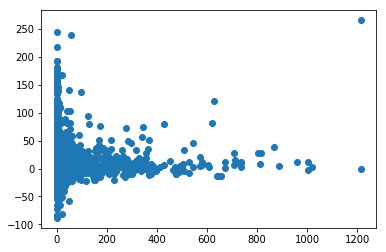

In [28]:
plt.scatter(y_test,y_pred)

In [29]:
s.T.sort_values(0,ascending=False)

,0
CENSUS_TRACT,13.868251
Owners_House_Zip_Code,11.095950
Lot,8.300182
Zip_Code,8.034603
Expiration_Date_Day,5.999148
Work_Type,5.811895
NTA_NAME,5.726013
Expiration_Date_Month,5.473448
Permittees_License_Type,4.856867
COUNCIL_DISTRICT,4.657211
